<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

##Drug Overdose Deaths
###Base Learning

* Akshat Bhardwaj <akshatb4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/akshat-bhardwaj/)
* Catherine Li <sl182@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/catherine-li-482797252/)
* Hélène Rondey <hrondey2@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/h%C3%A9l%C3%A8ne-r-98401a1b7?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BzsAqgF02Qd2grkWQ0eXwXg%3D%3D)
* Yang-Hsuan Huang <yhh4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/yang-hsuan-huang-904148281?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BCxCLmEzYQqKYAfU3aoIUug%3D%3D)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deep_Dive_Group_1
#%cd /content/drive/Shareddrives/Deep_Dive_Group_1

/content/drive/MyDrive/Deep_Dive_Group_1


In [ ]:
table = pd.read_csv("working_dataset.csv", thousands=',')
table= table.rename(columns={'Data Value' : 'Data_value',
              'Percent Complete': "Percent_complete",
              'Percent Pending Investigation': "Percent_pending_investigation",
              'State Name': "State_name",
              'Footnote Symbol': "Footnote_symbol",
              'Predicted Value': "Predicted_value"})
table

,State,Year,Month,Period,Indicator,Data_value,Percent_complete,Percent_pending_investigation,State_name,Footnote,Footnote_symbol,Predicted_value
0,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,YC,2023,March,12 month-ending,Methadone (T40.3),300.0,100,0.658376,New York City,Underreported due to incomplete data.,*,323.0
59996,YC,2023,March,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",2520.0,100,0.658376,New York City,Underreported due to incomplete data.,*,2730.0
59997,YC,2023,March,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",2364.0,100,0.658376,New York City,Underreported due to incomplete data.,*,2578.0
59998,YC,2023,March,12 month-ending,Cocaine (T40.5),1493.0,100,0.658376,New York City,Underreported due to incomplete data.,*,1617.0


In [ ]:
from numpy.ma.extras import isin
df2 = table[~table['Indicator'].isin(['Number of Deaths','Number of Drug Overdose Deaths','Percent with drugs specified','Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)','Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'])][table['State']!='US']
df2.drop(columns='Footnote',inplace=True)
df2.drop(columns=['Footnote_symbol','Data_value'],inplace=True)
df2.dropna(inplace=True)

<ipython-input-4-02ee87418776>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = table[~table['Indicator'].isin(['Number of Deaths','Number of Drug Overdose Deaths','Percent with drugs specified','Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)','Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'])][table['State']!='US']


In [ ]:
df2

,State,Year,Month,Period,Indicator,Percent_complete,Percent_pending_investigation,State_name,Predicted_value
108,AK,2015,November,12 month-ending,Methadone (T40.3),100,0.000000,Alaska,11.0
110,AK,2015,November,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",100,0.000000,Alaska,15.0
112,AK,2015,November,12 month-ending,Natural & semi-synthetic opioids (T40.2),100,0.000000,Alaska,48.0
113,AK,2015,November,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",100,0.000000,Alaska,79.0
116,AK,2015,November,12 month-ending,Heroin (T40.1),100,0.000000,Alaska,34.0
...,...,...,...,...,...,...,...,...,...
59994,YC,2023,March,12 month-ending,Psychostimulants with abuse potential (T43.6),100,0.658376,New York City,233.0
59995,YC,2023,March,12 month-ending,Methadone (T40.3),100,0.658376,New York City,323.0
59996,YC,2023,March,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",100,0.658376,New York City,2730.0
59997,YC,2023,March,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",100,0.658376,New York City,2578.0


We're dropping data_value firstly because it has high correlation with the outcome value it itself comes from predicted_value which we're trying to predict.

Thus it would cause a data leakage and thus needs to be dropped.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
label = ['Predicted_value']
feature = ['Year', 'Percent_pending_investigation',
      'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
      'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
      'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
      'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
      'State_MO', 'State_MS', 'State_MT', 'State_NC',
      'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
      'State_OK', 'State_OR', 'State_RI', 'State_SC', 'State_SD',
      'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
      'State_WI', 'State_WV', 'State_WY', 'State_YC',
      'Month_April', 'Month_August', 'Month_December', 'Month_February',
      'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
      'Month_November', 'Month_October', 'Month_September',
      'Indicator_Cocaine (T40.5)',
      'Indicator_Heroin (T40.1)',
      'Indicator_Methadone (T40.3)',
      'Indicator_Natural & semi-synthetic opioids (T40.2)',
      'Indicator_Opioids (T40.0-T40.4,T40.6)',
      'Indicator_Psychostimulants with abuse potential (T43.6)',
      'Indicator_Synthetic opioids, excl. methadone (T40.4)']




In [ ]:
df_preprocessed = df2.copy()


minmax_scaler_label = MinMaxScaler()
minmax_scaler_features = MinMaxScaler()
# label = "Predicted_value"

columns_to_remove = ['Period', 'Percent_complete', 'State_name']
df_preprocessed = df_preprocessed.drop(columns=columns_to_remove)
numerical_vars = ['Year', 'Percent_pending_investigation']
df_preprocessed[numerical_vars] = df_preprocessed[numerical_vars].fillna(df_preprocessed[numerical_vars].mean())
df_preprocessed[numerical_vars] = minmax_scaler_features.fit_transform(df_preprocessed[numerical_vars])

df_preprocessed[label] = minmax_scaler_label.fit_transform(df_preprocessed[label].values.reshape(-1,1))


#Convert 'State', 'Month', 'Indicator' as a set of binary variables for each modality (One-Hot Encoding)
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['State', 'Month', 'Indicator'])
df_preprocessed = df_preprocessed.astype("float32")
df_preprocessed.head()
#State LA, ND, NE, PA do not have data for causes of drug overdose death, so they are removed

,Year,Percent_pending_investigation,Predicted_value,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,...,Month_November,Month_October,Month_September,Indicator_Cocaine (T40.5),Indicator_Heroin (T40.1),Indicator_Methadone (T40.3),Indicator_Natural & semi-synthetic opioids (T40.2),"Indicator_Opioids (T40.0-T40.4,T40.6)",Indicator_Psychostimulants with abuse potential (T43.6),"Indicator_Synthetic opioids, excl. methadone (T40.4)"
108,0.0,0.0,0.000118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.000589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
112,0.0,0.0,0.004477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113,0.0,0.0,0.008130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
116,0.0,0.0,0.002828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Saving the scalers for later
pickle.dump(minmax_scaler_features, open('minmax_scaler_features.pkl', 'wb'))
pickle.dump(minmax_scaler_label, open('minmax_scaler_label.pkl', 'wb'))

In [ ]:
df_preprocessed.columns

Index(['Year', 'Percent_pending_investigation', 'Predicted_value', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_RI', 'State_SC',
       'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT',
       'State_WA', 'State_WI', 'State_WV', 'State_WY', 'State_YC',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Indicator_Cocaine (T40.5)', 'Indicator_Heroin (T40.1)',
       'Indicator_Meth

In [ ]:
df_preprocessed.dtypes

Year                                                       float32
Percent_pending_investigation                              float32
Predicted_value                                            float32
State_AK                                                   float32
State_AL                                                   float32
                                                            ...   
Indicator_Methadone (T40.3)                                float32
Indicator_Natural & semi-synthetic opioids (T40.2)         float32
Indicator_Opioids (T40.0-T40.4,T40.6)                      float32
Indicator_Psychostimulants with abuse potential (T43.6)    float32
Indicator_Synthetic opioids, excl. methadone (T40.4)       float32
Length: 70, dtype: object

In [ ]:

data = df_preprocessed[feature+label]
X = df_preprocessed[feature].squeeze()
Y = df_preprocessed[label].squeeze()
data.head()

,Year,Percent_pending_investigation,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Month_October,Month_September,Indicator_Cocaine (T40.5),Indicator_Heroin (T40.1),Indicator_Methadone (T40.3),Indicator_Natural & semi-synthetic opioids (T40.2),"Indicator_Opioids (T40.0-T40.4,T40.6)",Indicator_Psychostimulants with abuse potential (T43.6),"Indicator_Synthetic opioids, excl. methadone (T40.4)",Predicted_value
108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000118
110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000589
112,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004477
113,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.008130
116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002828


In [ ]:
data.to_csv("data_preprocessed.csv", index=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch
import scipy
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize=1,SEED=0): #default to one-dimensional feature and response
        super().__init__() #run init of torch.nn.Module
        if SEED is not None:
          torch.manual_seed(SEED)
        self.linear = torch.nn.Linear(inputSize,outputSize)
        if torch.cuda.is_available():
          self=self.cuda()

    def forward(self, x):
        out=self.linear(x)
        return out

In [ ]:
X.describe()

,Year,Percent_pending_investigation,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Month_November,Month_October,Month_September,Indicator_Cocaine (T40.5),Indicator_Heroin (T40.1),Indicator_Methadone (T40.3),Indicator_Natural & semi-synthetic opioids (T40.2),"Indicator_Opioids (T40.0-T40.4,T40.6)",Indicator_Psychostimulants with abuse potential (T43.6),"Indicator_Synthetic opioids, excl. methadone (T40.4)"
count,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,...,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000,25042.000000
mean,0.526071,0.076855,0.023041,0.003634,0.004712,0.019847,0.013138,0.015654,0.027953,0.026436,...,0.081423,0.080904,0.080545,0.139286,0.139006,0.133935,0.148031,0.148511,0.143399,0.147832
std,0.292153,0.108879,0.150038,0.060173,0.068484,0.139476,0.113868,0.124134,0.164842,0.160430,...,0.273489,0.272693,0.272140,0.346252,0.345960,0.340589,0.355138,0.355612,0.350486,0.354940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.010519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.034391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.094759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.2)
model = Ridge(alpha=0.6)
model.fit(X_train, y_train)


Ridge(alpha=0.6)

Here we're using Ridge regression isntead of unregularized linear regression or Lasso because firstly we want to regularize the features as a simple linear regression model tends to overfit the data, and lasso has a tendency to set the coefficients of many features to zero.

For categorical features we don't want to have features with exact zero coefficients, instead we want to know how much do each of them contribute relative to others.

Thus using Ridge here makes sense.

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
coefficients = model.coef_

feature_names = X_train.columns

feature_coefficients = zip(feature_names, coefficients)

for feature, coef in feature_coefficients:
    print(f"{feature}: {coef}")

Year: 447.48004150390625
Percent_pending_investigation: 233.6000213623047
State_AK: -427.0152282714844
State_AL: -229.8745880126953
State_AR: -475.2003479003906
State_AZ: 114.07926177978516
State_CA: 2205.53515625
State_CO: -134.0137481689453
State_CT: -32.244869232177734
State_DC: -332.50244140625
State_DE: -354.6648864746094
State_FL: 1786.548583984375
State_GA: 35.86375427246094
State_HI: -517.0386962890625
State_IA: -349.38055419921875
State_ID: -566.8577270507812
State_IL: 502.61474609375
State_IN: 165.21484375
State_KS: -440.59735107421875
State_KY: 51.59206008911133
State_MA: 296.39459228515625
State_MD: 311.100830078125
State_ME: -286.5792541503906
State_MI: 348.9718017578125
State_MN: -205.45654296875
State_MO: 0.5048379302024841
State_MS: -424.6036376953125
State_MT: -643.5152587890625
State_NC: 392.0678405761719
State_NH: -328.86077880859375
State_NJ: 490.081787109375
State_NM: -259.1939697265625
State_NV: -225.67950439453125
State_NY: 366.2963562011719
State_OH: 1026.747436

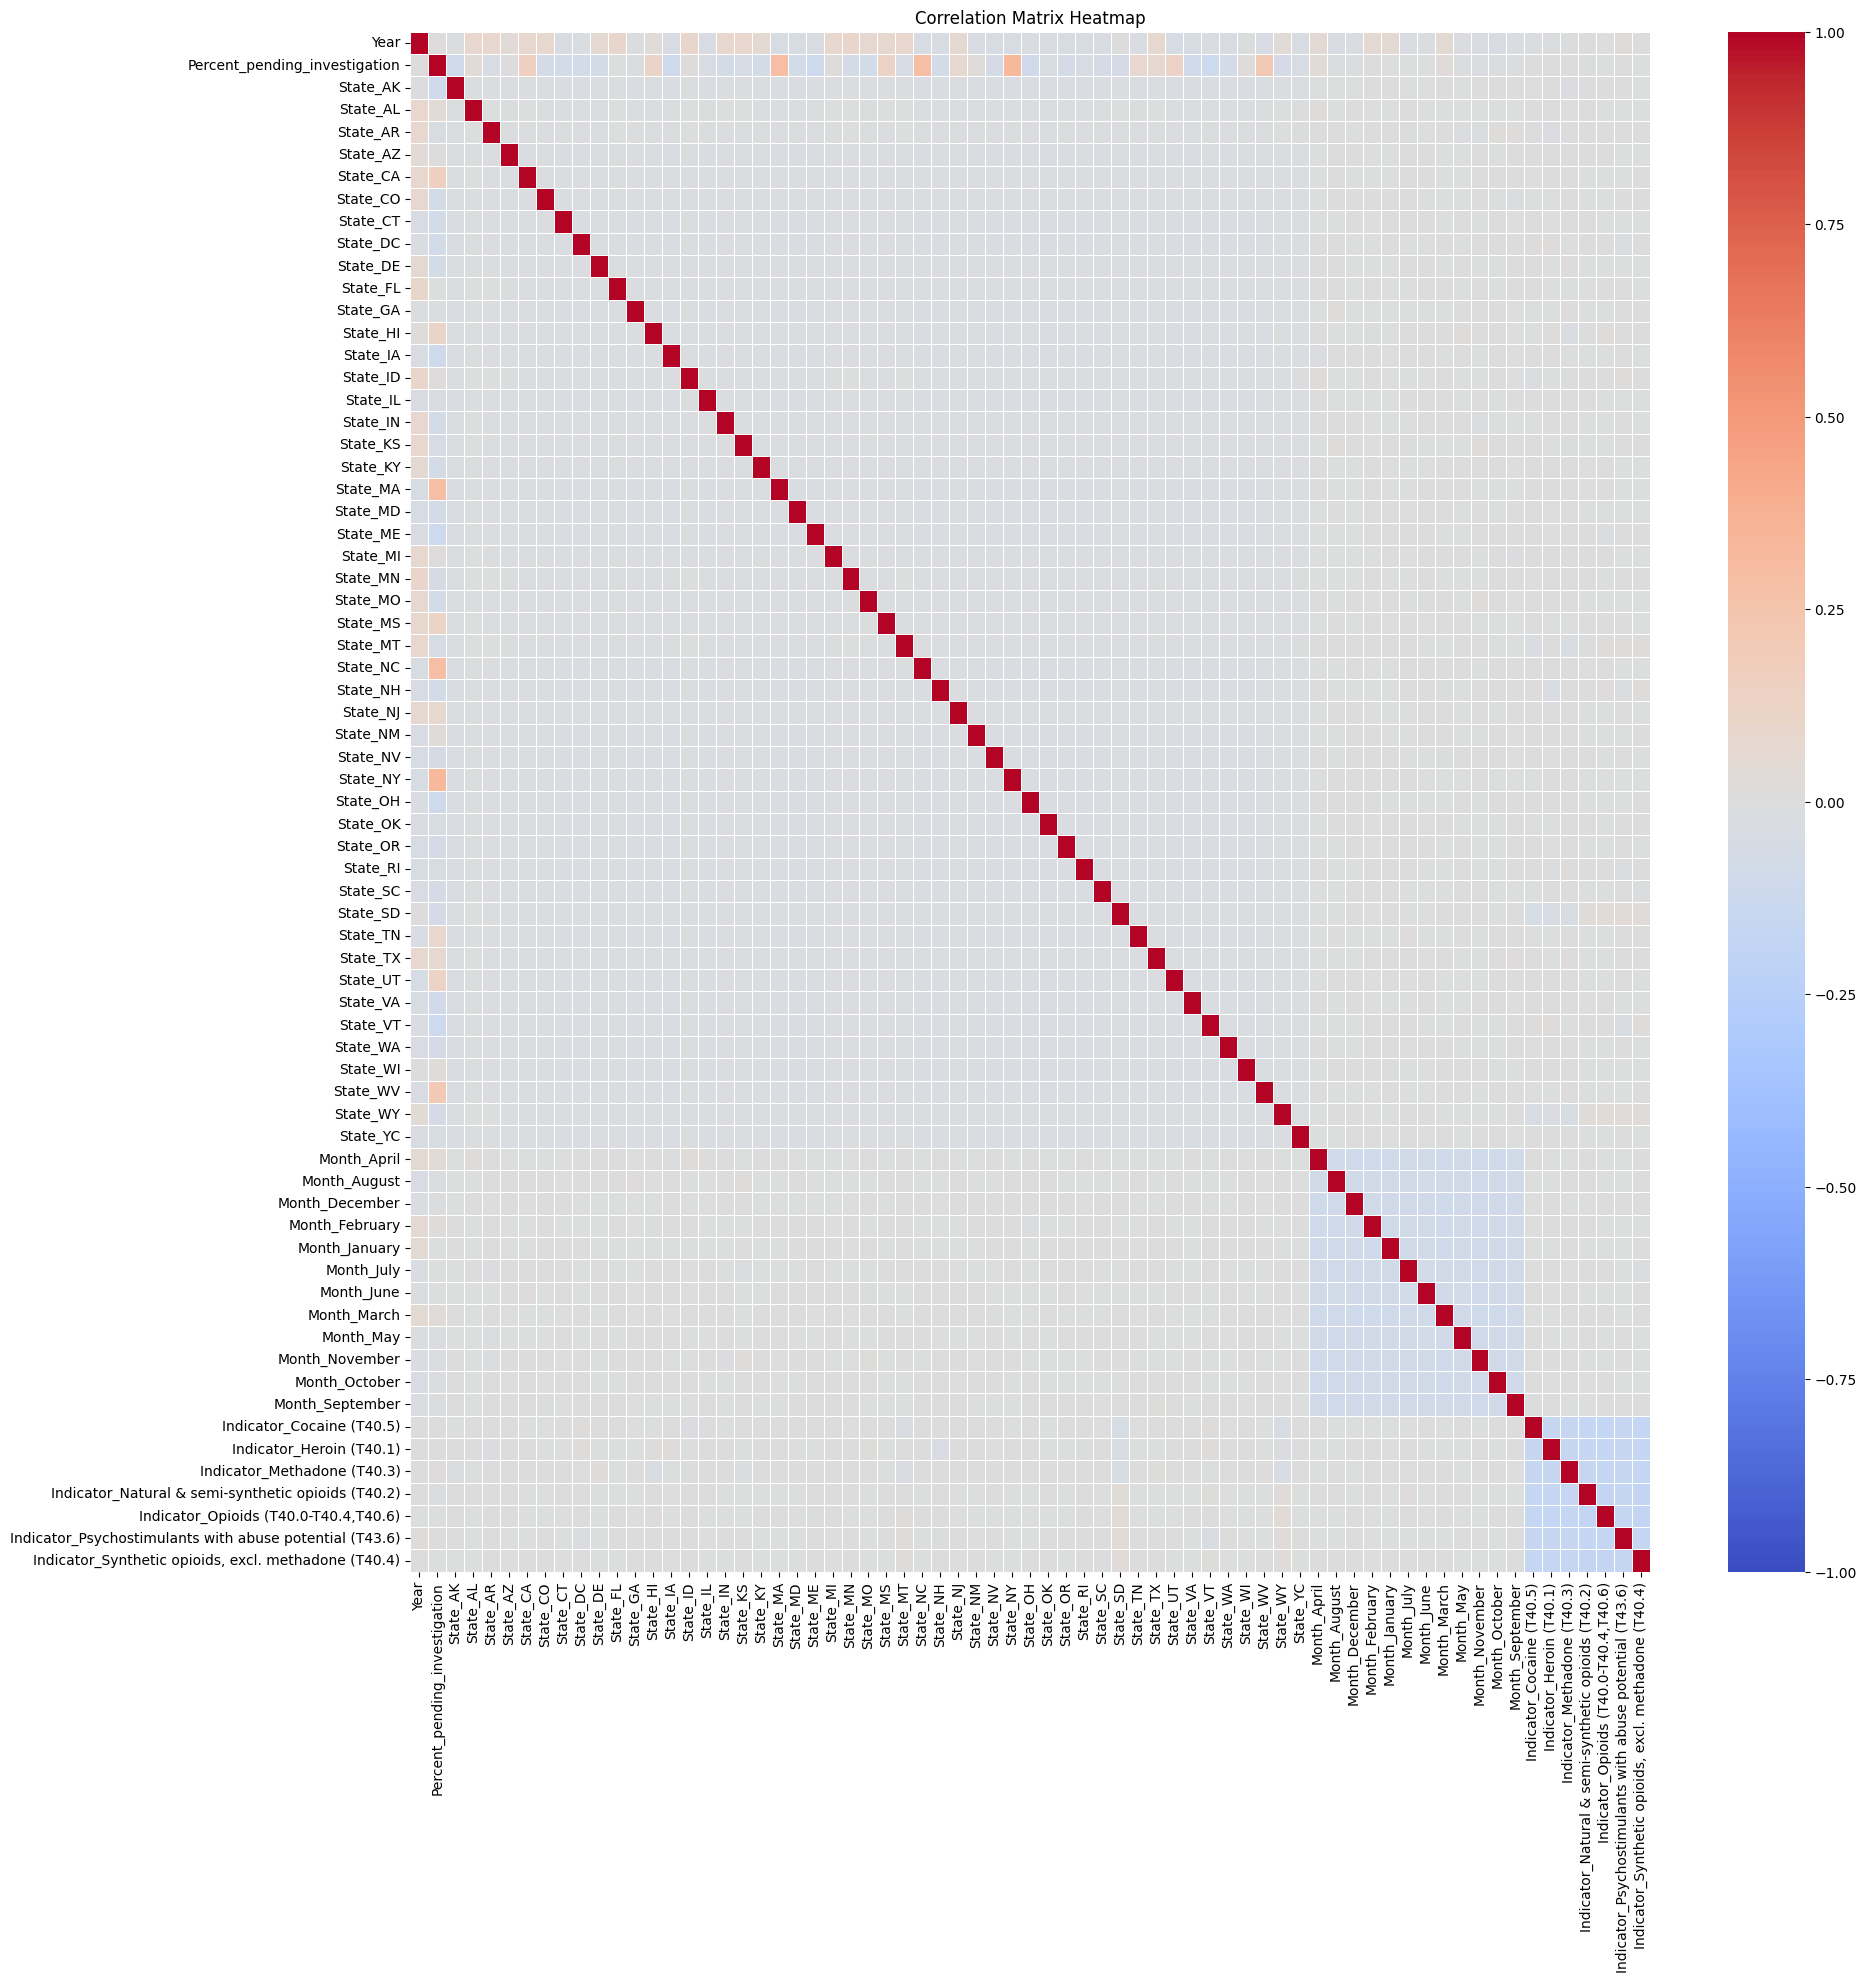

In [ ]:
correlation_matrix = X_train.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# pd.set_option('display.max_rows', None)
# X_train.iloc[1]
# # model.feature_names_in_.shape
# temp = pd.DataFrame(model.feature_names_in_, X_test.iloc[1]).reset_index()
# temp['coef'] = model.coef_
# #temp['mult'] = temp['coef'] *

# temp['mult'] = temp[temp.columns[0]] * temp['coef']
# temp['mult'].sum()

According to the correlation matrix heat map, we can see that there is not much correlation between features, so we do not have to consider the interaction factor.

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
comparison_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred
})
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(comparison_df)
print(mae)
print(mse)

       Actual Value  Predicted Value
30101         514.0       878.727905
18685        1234.0      1357.874023
43479          31.0      -480.382050
43505         204.0       438.163391
18637         771.0      1035.408813
...             ...              ...
36107          52.0        -3.675720
37999         611.0      1100.175293
18970         338.0       594.532593
29892         212.0       539.349121
41354          84.0        34.951859

[5009 rows x 2 columns]
333.20926
254527.14


In [ ]:
y_pred.shape

(5009,)

In [ ]:
df_results = (y_test, y_pred)

# df_results = minmax_scaler_label.inverse_transform(df_results)
df_results = pd.DataFrame(df_results)
df_results = np.transpose(df_results)
df_results.columns = ["Predicted_value", "Predicted_predicted_value"]

mean_i = np.mean(df_results["Predicted_predicted_value"])
mae_i = mean_absolute_error(df_results["Predicted_value"], df_results["Predicted_predicted_value"])
mse_i = mean_squared_error(df_results["Predicted_value"], df_results["Predicted_predicted_value"])
sd_i = mse_i**0.5

rounded_up_mean = round(mean_i, 0)
rounded_up_mae = round(mae_i, 0)
rounded_up_sd = round(sd_i, 0)

print(df_results)
print(f"Mean: {rounded_up_mean} deaths")
print(f"Mean Absolute Error: {rounded_up_mae} deaths")
print(f"Standard Deviation: {rounded_up_sd} deaths")

NotFittedError: ignored